In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('results.csv')

In [4]:
data.head()

,Unnamed: 0,Hindi,English,Science,Maths,History,Geograpgy,Total,Results,Div
0,0,65,10,59,3,71,37,245,0,3
1,1,94,56,4,67,91,50,362,1,1
2,2,7,85,76,99,60,25,352,0,2
3,3,88,46,59,94,52,38,377,1,1
4,4,39,81,37,38,6,54,255,1,3


In [5]:
# Select only the relevant columns
df = data[['English', 'Science', 'Maths', 'History', 'Geograpgy']]


In [6]:
df.head()

,English,Science,Maths,History,Geograpgy
0,10,59,3,71,37
1,56,4,67,91,50
2,85,76,99,60,25
3,46,59,94,52,38
4,81,37,38,6,54


In [7]:
# Check for missing values
print(df.isnull().sum())

English      0
Science      0
Maths        0
History      0
Geograpgy    0
dtype: int64


In [8]:
# Check the data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   English    1000 non-null   int64
 1   Science    1000 non-null   int64
 2   Maths      1000 non-null   int64
 3   History    1000 non-null   int64
 4   Geograpgy  1000 non-null   int64
dtypes: int64(5)
memory usage: 39.2 KB


In [9]:
# Summary statistics to understand the distribution of grades
df.describe()

,English,Science,Maths,History,Geograpgy
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,50.110000,49.440000,49.553000,49.03400,50.028000
std,28.048505,28.921114,28.632447,28.76975,28.710268
min,0.000000,0.000000,0.000000,0.00000,0.000000
25%,26.000000,25.000000,25.750000,24.00000,26.000000
50%,50.500000,50.000000,49.000000,49.00000,49.000000
75%,75.000000,73.250000,74.000000,73.25000,75.000000
max,99.000000,99.000000,99.000000,99.00000,99.000000


### Creating course labels

In [10]:
# def assign_course(row):
#     if row['Science'] > 60 and row['Maths'] > 60:
#         return 'Engineering'
#     elif row['English'] > 50 and row['History'] > 50:
#         return 'Humanities'
#     elif row['Geograpgy'] > 50:
#         return 'Environmental Studies'
#     else:
#         return 'General Studies'

def assign_course(row):
    if 61 <= row['Science'] <= 100 and 61 <= row['Maths'] <= 100:
        return 'Engineering'
    elif 51 <= row['English'] <= 100 and 51 <= row['History'] <= 100:
        return 'Humanities'
    elif 51 <= row['Geograpgy'] <= 100:
        return 'Environmental Studies'
    else:
        return 'General Studies'


# Apply the function to create a new column
df['Course'] = df.apply(assign_course, axis=1)
df.head()

/tmp/ipykernel_5429/3748782424.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Course'] = df.apply(assign_course, axis=1)


,English,Science,Maths,History,Geograpgy,Course
0,10,59,3,71,37,General Studies
1,56,4,67,91,50,Humanities
2,85,76,99,60,25,Engineering
3,46,59,94,52,38,General Studies
4,81,37,38,6,54,Environmental Studies


In [11]:
df.tail()

,English,Science,Maths,History,Geograpgy,Course
995,89,68,58,13,13,General Studies
996,62,25,87,51,68,Humanities
997,83,70,14,11,78,Environmental Studies
998,82,31,42,84,52,Humanities
999,78,68,33,79,91,Humanities


In [12]:
df['Course'].value_counts()


Course
General Studies          335
Environmental Studies    297
Humanities               205
Engineering              163
Name: count, dtype: int64

In [13]:
# Features (grades)
X = df[['English', 'Science', 'Maths', 'History', 'Geograpgy']]

# Target (course)
y = df['Course']


In [14]:
from sklearn.model_selection import train_test_split

# Split the data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the Logistic Regression model
logreg_model = LogisticRegression(random_state=42)


In [16]:
# Train the model on the training data
logreg_model.fit(X_train, y_train)

/home/topister/Desktop/divic_final_project/divic/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [17]:
# Predict on the test data
y_pred_logreg = logreg_model.predict(X_test)

In [18]:
# Evaluate
logreg_accuracy = accuracy_score(y_test, y_pred_logreg)
print(f'Logistic Regression Accuracy: {logreg_accuracy:.2f}')

Logistic Regression Accuracy: 0.82


In [19]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Predict on the test data
y_pred_rf = rf_model.predict(X_test)

# Evaluate
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {rf_accuracy:.2f}')


Random Forest Accuracy: 0.98


In [20]:
from sklearn.svm import SVC

# Initialize the SVM model
svm_model = SVC(random_state=42)

# Train the model on the training data
svm_model.fit(X_train, y_train)

# Predict on the test data
y_pred_svm = svm_model.predict(X_test)

# Evaluate
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print(f'Support Vector Machine (SVM) Accuracy: {svm_accuracy:.2f}')


Support Vector Machine (SVM) Accuracy: 0.85


In [21]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN model
knn_model = KNeighborsClassifier()

# Train the model on the training data
knn_model.fit(X_train, y_train)

# Predict on the test data
y_pred_knn = knn_model.predict(X_test)

# Evaluate
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print(f'K-Nearest Neighbors (KNN) Accuracy: {knn_accuracy:.2f}')


K-Nearest Neighbors (KNN) Accuracy: 0.83


In [22]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
dt_model.fit(X_train, y_train)

# Predict on the test data
y_pred_dt = dt_model.predict(X_test)

# Evaluate
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print(f'Decision Tree Accuracy: {dt_accuracy:.2f}')


Decision Tree Accuracy: 0.98


In [24]:
# Summarizing the accuracy of all models
model_performance = {
    'Logistic Regression': logreg_accuracy,
    'Random Forest': rf_accuracy,
    'Support Vector Machine (SVM)': svm_accuracy,
    'K-Nearest Neighbors (KNN)': knn_accuracy,
    'Decision Tree': dt_accuracy
}

# Print out the performance comparison
for model, accuracy in model_performance.items():
    print(f'{model}: {accuracy:.2f}')


Logistic Regression: 0.82
Random Forest: 0.98
Support Vector Machine (SVM): 0.85
K-Nearest Neighbors (KNN): 0.83
Decision Tree: 0.98


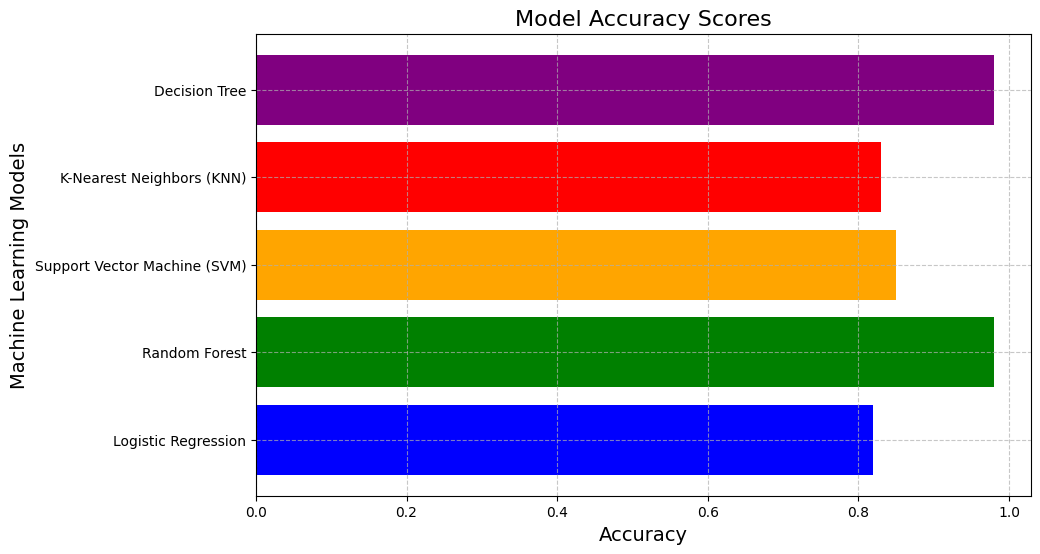

In [25]:
# Extracting model names and their corresponding accuracy scores
models = list(model_performance.keys())
accuracy_scores = list(model_performance.values())

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.barh(models, accuracy_scores, color=['blue', 'green', 'orange', 'red', 'purple'])

# Add titles and labels
plt.title('Model Accuracy Scores', fontsize=16)
plt.xlabel('Accuracy', fontsize=14)
plt.ylabel('Machine Learning Models', fontsize=14)

# Add a grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Display the chart
plt.show()

### Hyperparameter tuning on the best model

In [26]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV for Random Forest
grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                              param_grid=param_grid_rf,
                              cv=5,  # 5-fold cross-validation
                              n_jobs=-1,  # Use all available cores
                              scoring='accuracy')

# Fit GridSearchCV
grid_search_rf.fit(X_train, y_train)

# Get the best parameters and best score
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

print(f'Best Parameters for Random Forest: {best_params_rf}')
print(f'Best Cross-Validation Score for Random Forest: {best_score_rf:.2f}')


Best Parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-Validation Score for Random Forest: 0.99


In [27]:
# Define the parameter grid for Decision Tree
param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV for Decision Tree
grid_search_dt = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                              param_grid=param_grid_dt,
                              cv=5,  # 5-fold cross-validation
                              n_jobs=-1,  # Use all available cores
                              scoring='accuracy')

# Fit GridSearchCV
grid_search_dt.fit(X_train, y_train)

# Get the best parameters and best score
best_params_dt = grid_search_dt.best_params_
best_score_dt = grid_search_dt.best_score_

print(f'Best Parameters for Decision Tree: {best_params_dt}')
print(f'Best Cross-Validation Score for Decision Tree: {best_score_dt:.2f}')


Best Parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Cross-Validation Score for Decision Tree: 0.99


### Cross-Validation
Cross-validation helps in evaluating the model's performance more robustly.



In [28]:
from sklearn.model_selection import cross_val_score

# Initialize the Random Forest model with best parameters
best_rf_model = RandomForestClassifier(**best_params_rf, random_state=42)

# Perform cross-validation
cv_scores_rf = cross_val_score(best_rf_model, X, y, cv=5, scoring='accuracy')
print(f'Random Forest Cross-Validation Scores: {cv_scores_rf}')
print(f'Random Forest Mean CV Score: {cv_scores_rf.mean():.2f}')


Random Forest Cross-Validation Scores: [0.99  0.995 0.99  0.995 0.985]
Random Forest Mean CV Score: 0.99


In [29]:
# Initialize the Decision Tree model with best parameters
best_dt_model = DecisionTreeClassifier(**best_params_dt, random_state=42)

# Perform cross-validation
cv_scores_dt = cross_val_score(best_dt_model, X, y, cv=5, scoring='accuracy')
print(f'Decision Tree Cross-Validation Scores: {cv_scores_dt}')
print(f'Decision Tree Mean CV Score: {cv_scores_dt.mean():.2f}')


Decision Tree Cross-Validation Scores: [0.985 0.985 0.985 1.    0.98 ]
Decision Tree Mean CV Score: 0.99


### Feature importance

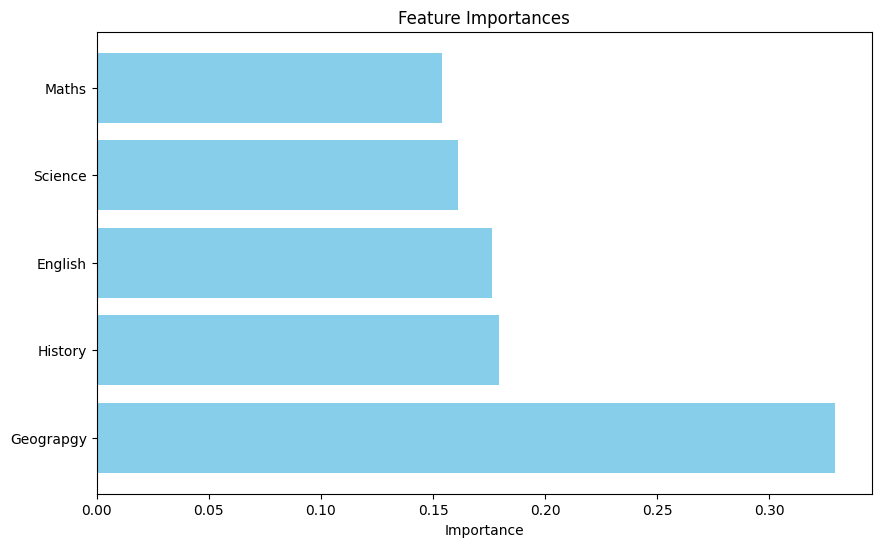

In [30]:
import matplotlib.pyplot as plt

# Train the Random Forest model with best parameters
best_rf_model.fit(X, y)

# Get feature importances
importances = best_rf_model.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()


In [31]:
import joblib

# Save the model
joblib.dump(best_rf_model, 'best_rf_model.pkl')

['best_rf_model.pkl']

## Comments from mentor:

review the labels columns and add the ranges

science 61-100 range

English 50 history 55 range

Geograph 58